In [3]:
# Import Basic libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Import ML Components 
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             classification_report, confusion_matrix, RocCurveDisplay,
                             PrecisionRecallDisplay)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
# Read the dataset
data = pd.read_csv("fraud_dataset.csv")
print(data.shape)
print(data.dtypes)
print(data['isFraud'].value_counts(dropna=False))
data.head()

(6362620, 10)
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object
isFraud
0    6354407
1       8213
Name: count, dtype: int64


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [ ]:
# Visualization

In [7]:
data.dtypes.value_counts()

float64    5
object     3
int64      2
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

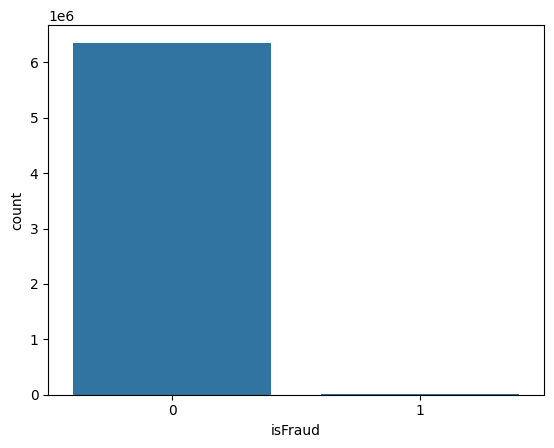

In [8]:
sns.countplot(x='isFraud', data = data)

<Axes: xlabel='type', ylabel='count'>

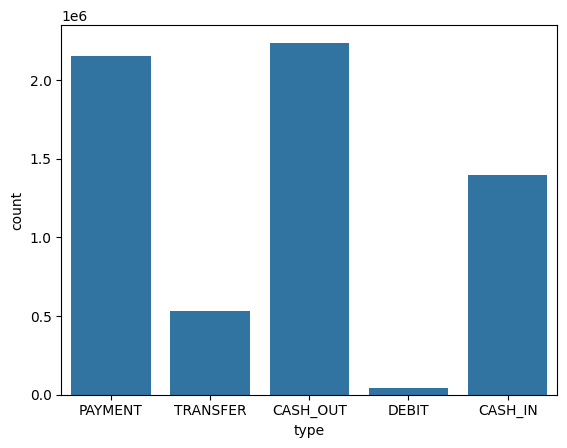

In [7]:
sns.countplot(x='type', data = data)

<Axes: xlabel='type', ylabel='amount'>

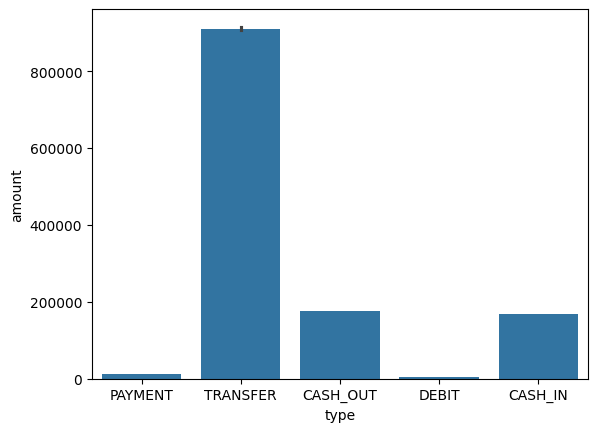

In [10]:
sns.barplot(x='type', y='amount', data=data)

<Figure size 1500x600 with 0 Axes>

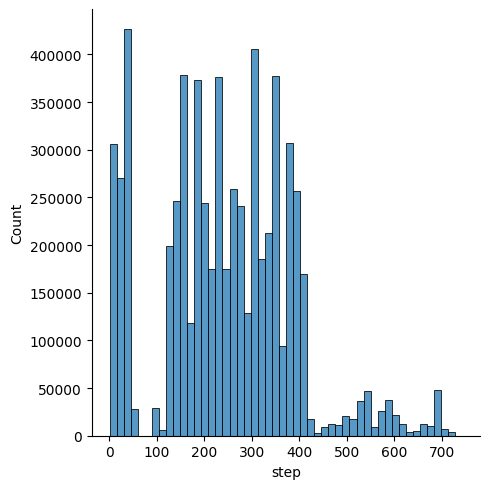

In [11]:
plt.figure(figsize=(15, 6))
sns.displot(data['step'], bins=50)

<Axes: >

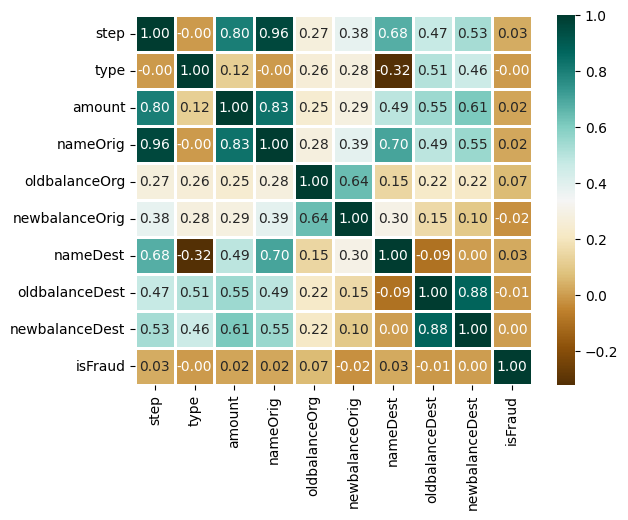

In [8]:
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [12]:
# Preprocessing
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,False,False,True,False


In [13]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [15]:
# Model Training 
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

decision_tree_model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.84      0.61      0.71      2435

    accuracy                           1.00   1908786
   macro avg       0.92      0.81      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [16]:
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision (Fraud class): {precision:.4f}")
print(f"Recall (Fraud class):    {recall:.4f}")
print(f"F1-score (Fraud class):  {f1:.4f}")

Precision (Fraud class): 0.8359
Recall (Fraud class):    0.6131
F1-score (Fraud class):  0.7074


In [17]:
# Boosting: Each new tree focuses on the errors (misclassified samples) from the previous ones, 
# gradually improving the overall performance.

# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(
    n_estimators = 50,
    learning_rate = 0.05, 
    max_depth = 3,
    random_state = 42
)
gradient_boosting_model.fit(X_train, y_train)
y_pred = gradient_boosting_model.predict(X_test)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision (Fraud class): {precision:.4f}")
print(f"Recall (Fraud class):    {recall:.4f}")
print(f"F1-score (Fraud class):  {f1:.4f}")

Precision (Fraud class): 0.9619
Recall (Fraud class):    0.7146
F1-score (Fraud class):  0.8200


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Handling imbalance: scale_pos_weight = ratio of negatives to positives
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.1,
    gamma=0.2,
    scale_pos_weight=scale,
    tree_method='hist',  # efficient histogram-based split finding
    eval_metric='aucpr',
    random_state=42
)

xgb_model.fit(X_train, y_train)
preds = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost ROC-AUC:", roc_auc_score(y_test, preds))
print(classification_report(y_test, (preds >= 0.5).astype(int)))

XGBoost ROC-AUC: 0.9989058424945775
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.40      0.99      0.57      2435

    accuracy                           1.00   1908786
   macro avg       0.70      0.99      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [19]:
# Random Forest - Bagging techniques
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,
    max_features='sqrt',   # random √M features per split
    max_depth=None,
    bootstrap=True,        # random sampling of rows with replacement
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
preds = rf.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC:", roc_auc_score(y_test, preds))
print(classification_report(y_test, (preds >= 0.5).astype(int)))

Random Forest ROC-AUC: 0.9908430402029222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



# THIS SNIPPER TELLS HOW TO RUN MULTIPLE MODELS IN A LOOP

In [ ]:


# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score as ras
# from sklearn.linear_model import LogisticRegression

# models = [LogisticRegression(), XGBClassifier(),
#           RandomForestClassifier(n_estimators=7,
#                                  criterion='entropy', 
#                                  random_state=7)]

# for i in range(len(models)):
#     models[i].fit(X_train, y_train)
#     print(f'{models[i]} : ')
    
#     train_preds = models[i].predict_proba(X_train)[:, 1]
#     print('Training Accuracy : ', ras(y_train, train_preds))
    
#     y_preds = models[i].predict_proba(X_test)[:, 1]
#     print('Validation Accuracy : ', ras(y_test, y_preds))
#     print()
